In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func_prime_1(x, y_1, y_2): #dy_1/dx
    return y_2

In [3]:
def func_prime_2(x, y_1, y_2): #dy_2/dx
    return -4.0 * np.sin(y_1)

In [6]:
def RK4(x_old, y1_old, y2_old, h):
    k_1_prime1 = func_prime_1(x_old, y1_old, y2_old)
    k_1_prime2 = func_prime_2(x_old, y1_old, y2_old)
    
    # primer paso
    x1 = x_old + 0.5*h
    y1_1 = y1_old + 0.5 * h * k_1_prime1 
    y2_1 = y2_old + 0.5 * h * k_1_prime2
    k_2_prime1 = func_prime_1(x1, y1_1, y2_1)
    k_2_prime2 = func_prime_2(x1, y1_1, y2_1) 
    
    # segundo paso
    x2 = x_old + 0.5*h
    y1_2 = y1_old + 0.5 * h * k_2_prime1 
    y2_2 = y2_old + 0.5 * h * k_2_prime2
    k_3_prime1 = func_prime_1(x2, y1_2, y2_2)
    k_3_prime2 = func_prime_2(x2, y1_2, y2_2) 
    
    # segundo paso
    x3 = x_old + h
    y1_3 = y1_old + h * k_3_prime1 
    y2_3 = y2_old + h * k_3_prime2
    k_4_prime1 = func_prime_1(x3, y1_3, y2_3)
    k_4_prime2 = func_prime_2(x3, y1_3, y2_3) 
    
    average_k_1 = (1.0/6.0) * (k_1_prime1 + 2*k_2_prime1 + 2*k_3_prime1 + k_4_prime1)
    average_k_2 = (1.0/6.0) * (k_1_prime2 + 2*k_2_prime2 + 2*k_3_prime2 + k_4_prime2)
    
    x_new = x_old + h
    y1_new = y1_old + h * average_k_1
    y2_new = y2_old + h * average_k_2
    return x_new, y1_new, y2_new


In [13]:
min_x = 0.0
max_x = 6.0*np.pi
h = 0.1
n_points = int((max_x - min_x)/h)
x = np.zeros(n_points)
y_1 = np.zeros(n_points)
y_2 = np.zeros(n_points)

x[0] = min_x
y_1[0] = 0.1
y_2[0] = 0.0

for i in range(1, n_points):
    x[i], y_1[i], y_2[i] = RK4(x[i-1], y_1[i-1], y_2[i-1], h)

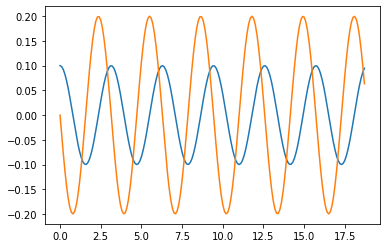

In [15]:
plt.plot(x, y_1)
plt.plot(x, y_2)